# Student Performance in Exams

In order to take actions and neccessary measures to ensure academic success, it is important to understand the influence of various factors like economic, personal and social on student's performance. 

In this study, we will use a dataset from [kaggle](https://www.kaggle.com/spscientist/student-performance-in-exams/data), on marks secured by high school students from the United States.

#### Aim

- To perform hypothesis test on inferences using the data.

Let’s start with an activity studying the effect of gender on exam performance.

## Does gender affect the performance of students in exams?
parameter (test statistic): difference in mean score $\mu_{m} - \mu_{f}$

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
np.random.seed(42)

%matplotlib inline

In [2]:
df = pd.read_csv("StudentsPerformance.csv")
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [3]:
df['gender'].value_counts()/df.shape[0]

female    0.518
male      0.482
Name: gender, dtype: float64

In [4]:
df.groupby('gender')[['math score', 'reading score', 'writing score']].mean()

,math score,reading score,writing score
gender,,,
female,63.633205,72.608108,72.467181
male,68.728216,65.473029,63.311203


In [5]:
df_m=df.query('gender == "male"')['math score']
df_f=df.query('gender == "female"')['math score']

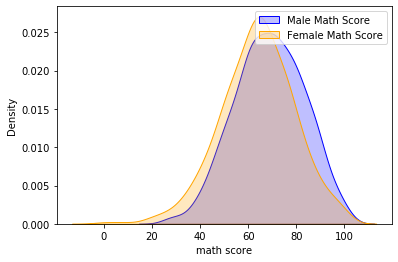

In [40]:
sb.kdeplot(df_m, shade=True, color="b")
sb.kdeplot(df_f, shade=True, color="orange")
plt.legend(('Male Math Score', 'Female Math Score'))
plt.show()

Population parameter

In [7]:
male_mean = df[df['gender'] == 'male']['math score'].mean() #computes the mean math score for male students
female_mean = df[df['gender'] == 'female']['math score'].mean() #computes the mean mathe score for female students
pop_diff_means = male_mean - female_mean #gives the difference
print('The difference in population means is {}'.format(round(pop_diff_means,4)))

The difference in population means is 5.095


## Generating our hypothesis

**Scenario 1: One-sided alternative**

Suppose we are interested in testing whether the mean math score for male students is different as for female students (gender bias).

 
$H_{0}$: Both male and female students have the same mean math score

vs $H_{1}$: Male students have higher mean math score than female students

Mathematically,

\begin{align}
H_{0}: \mu_{m} - \mu_{f} = 0\\
H_{1}: \mu_{m} - \mu_{f}  > 0
\end{align}

**$\mu_{m}$ and $\mu_{f}$** are the population mean values for male and female students, respectivley. **Since there is no directional component associated with this statement, an equal to seems most reasonable.**



**Scenario 2: Two-sided alternative**

$H_{0}$: Both male and female students have the same mean math score

vs $H_{1}$: There is a difference in mean math scores for male and female students


Mathematically,

\begin{align}
H_{0}: \mu_{m} - \mu_{f} = 0\\
H_{1}: \mu_{m} - \mu_{f} \neq 0
\end{align}

In other words, the null hypothesis $H_{0}$ suggests that both male and female students have the different mean math score. This is the “hypothesized universe” we’ll assume is true. On the other hand, the alternative hypothesis $H_{1}$ suggests that there is no difference.


Since the unknown population parameter of interest is the difference in population means $\mu_m - \mu_f$, the test statistic of interest here is the difference in sample means $\tilde{x}_{m} - \tilde{x}_{n}$

### Types of Error

- Type 1 error: rejecting $H_{0}$ when infact $H_{0}$ is true (false positives)
- Type II error: fail to reject $H_{0}$ when in fact $H_{0}$ is false

#### Consequencies: 

- In type I error, since our null hypothesis suggests that there is no difference in mean math score for both gender, as a type I error, rejecting the null hypothesis implies that we get to believe that there is a difference in mean math score for both genders when actually there is no difference. Therefore we are likely to dedicate our time and resources unneccessarily to understand the reason.

- In type II error, failing to reject the null hypothesis implies we get to believe that there is no difference when actually there is a difference -  As a result, no neccessary steps will be taken to understand whether students are facing any difficulties. This is more costly and dangerous.

**Conservative hypothesis testing procedure**

Furthermore, since we want to be careful about failing to reject the null hypothesis when it is actually false, we will pre-specify a high significance level of 0.1.  By setting this value high, all things being equal, there is a higher chance that the p-value will be less than $\alpha$. Thus, there is a higher chance that we’ll not fail to reject the null hypothesis $H_{0}$ in favor of the alternative hypothesis $H_{1}$. In other words, we’ll not fail to reject the hypothesis that there is no difference in mean math score for both male and female students, only if we have quite strong evidence.

## Conducting the hypothesis test

In [8]:
sample_df = df.sample(300)

### Simulating from the null

#### Sampling distribution: Difference in sample mean

In [37]:
samp_male_mean = sample_df[sample_df['gender'] == 'male']['math score'].mean()
samp_female_mean = sample_df[sample_df['gender'] == 'female']['math score'].mean()
samp_diff_means = samp_male_mean - samp_female_mean
print("The mean math score for male students is {}".format(samp_male_mean))
print("The mean math score for female students is {}".format(samp_female_mean))
print("The difference in mean math score for male and female students is {}".format(samp_diff_means))


The mean math score for male students is 67.4968152866242
The mean math score for female students is 61.99300699300699
The difference in mean math score for male and female students is 5.503808293617205


#### Bootstrapping
For 10,000 iterations: bootstrap the sample data

In [10]:
male_mean_score, female_mean_score, diff_mean = [],[],[]

for _ in range(10000):
    boot_sample = sample_df.sample(300, replace = True)
    male_mean = boot_sample[boot_sample['gender'] == 'male']['math score'].mean()
    female_mean = boot_sample[boot_sample['gender'] == 'female']['math score'].mean()
    mean_mms = male_mean_score.append(male_mean)
    mean_fms = female_mean_score.append(female_mean)
    boot_diff = diff_mean.append(male_mean - female_mean)

In [11]:
print("The standard deviation of our sampling distribution is {}".format(np.std(diff_mean)))

The standard deviation of our sampling distribution is 1.7778766114305362


In [12]:
null_vals = np.random.normal(0, np.std(diff_mean), 10000)

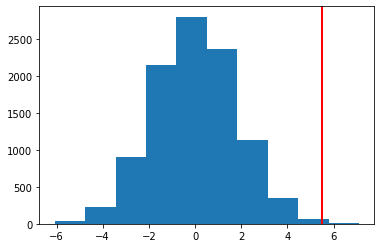

In [13]:
plt.hist(null_vals);
plt.axvline(samp_diff_means,color='r', linewidth=2);

First the histogram is our null distribution. Second, the solid red line is the observed test statistic, or the difference in sample means we observed in real life of 67.4968 - 61.9930 = 5.5038. So each draw represents a possible difference in means for our null hypothesis. Since our statistic is farther away from thebulk of the distribution, it suggests that the null wasnt likely to have generatedour hyothesis. The question now is where does the sample difference in mean falls in this distribution? 

case1:

\begin{align}
H_{0}: \mu_{m} - \mu_{f} = 0\\
H_{1}: \mu_{m} - \mu_{f}  > 0
\end{align}

Because our sample mean difference 5.5038 is to the right of the center of distribution (null mean) of 0, and the alternative is greater than, we shade to the right - this would shade less than 90% of the distribution. 

#### Calculating p-value for case 1

Recall p-value is the probability of obtaining a test statistic just as or more extreme than the observed test statistic assuming the null hypothesis $H_{0}$ is true.

In [25]:
#Calculate the P-value: compare statistics to values from the null
#null values greaterthan sample mean
p =  (null_vals > samp_diff_means).mean()
p

0.0015

So we see that our p-value $p < \alpha$, hence we reject the null hypothesis. 

#### Calculating p-value for case 2

\begin{align}
H_{0}: \mu_{m} - \mu_{f} = 0\\
H_{1}: \mu_{m} - \mu_{f}  \neq 0
\end{align}

In [35]:
#values more extreme than our sample mean in either direction away from our null hyp
null_mean = 0.007934
(null_vals > samp_diff_means).mean() + (null_vals < null_mean +(null_mean - samp_diff_means)).mean()

0.0022

This p-value of 0.0022 is very small. In other words, there is a very small chance that we’d observe a difference of 67.4968 - 61.9930 = 5.5038 in a hypothesized universe where there was truly no difference in math score.
 
Let us look at where these values fall on the distribution of null values.

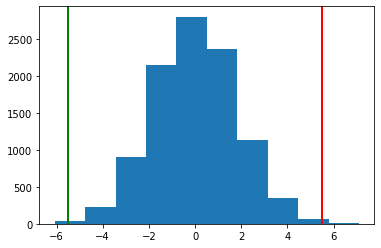

In [44]:
high = samp_diff_means
low = null_mean + (null_mean - samp_diff_means)

plt.hist(null_vals);
plt.axvline(low,color='g', linewidth=2)
plt.axvline(high,color='r', linewidth=2);

Therefore if we were to shade more extreme to the right and left of the distribution, there are few data points from our null hypothesis thatfall inside of this region. Hence the null hypothesis did not generate our sample statistics.


Moreso since the p-value is smaller than our pre-specified  $\alpha$ significance level of 0.1. Thus, we are inclined to reject the null hypothesis  $H_{0}:\mu_m - \mu_f = 0$

In non-statistical language, the conclusion is: we do not have the evidence needed in this sample of data to suggest that we should fail to reject the hypothesis that there is no difference in mean math score between male and female students. We, thus, can say that a difference exists in math scores, on average, for all male and female students.

In both cases, it seems we would somewhat rarely observe changes in difference in mean. In other words, the  p-value is somewhat small; $p < \alpha = (0.05)$. Hence, we would be inclined to reject $H_{0}$.
 
In other words, these p-values are sufficiently small to fail to reject our hypothesized universe of no gender discrimination. We instead have enough evidence to change our mind in favor of gender discrimination being a likely culprit here. 

### Simulating from confidence interval

Aim: To create the corresponding bootstrap distribution needed to construct a 95% confidence interval. 

We already have our setup. We will just go ahead and print the corresponding confidence levels.

In [51]:
low,high = np.percentile(diff_mean, 2.5), np.percentile(diff_mean,97.5)
low, high

(2.0787882709348744, 8.999601372974025)

we are 95% “confident” that the true difference in population $\mu_{m} - \mu_{f}$ is between (2.0788, 8.9996). Let’s visualize bootstrap_distribution and this percentile-based 95% confidence interval.

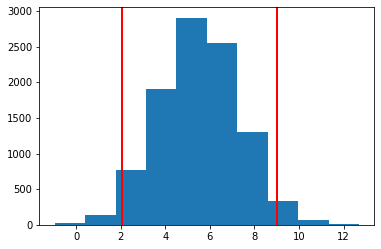

In [52]:
plt.hist(diff_mean);
plt.axvline(x=low, color='r', linewidth=2);
plt.axvline(x=high, color='r', linewidth=2);

Notice a key value that is not included in the 95% confidence interval for  $\mu_{m}-\mu_{f}$: the value 0. In other words, a difference of 0 is not included in our net, suggesting that $\mu_{m}$ and $\mu_{f}$ are truly different! Furthermore, observe how the entirety of the 95% confidence interval for $\mu_{m}-\mu_{f}$ lies above 0, suggesting that this difference is in favor of male students.
  
In the above case, our interval was entirely not equal to zero, which would suggest we fail to reject the null hypothesis (the population mean is not equal to zero).